In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [23]:
df=pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

In [5]:
# knowing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# dropping duplicates if any
df.drop_duplicates(inplace=True)

no null values and no duplicates on the dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


# univariate analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

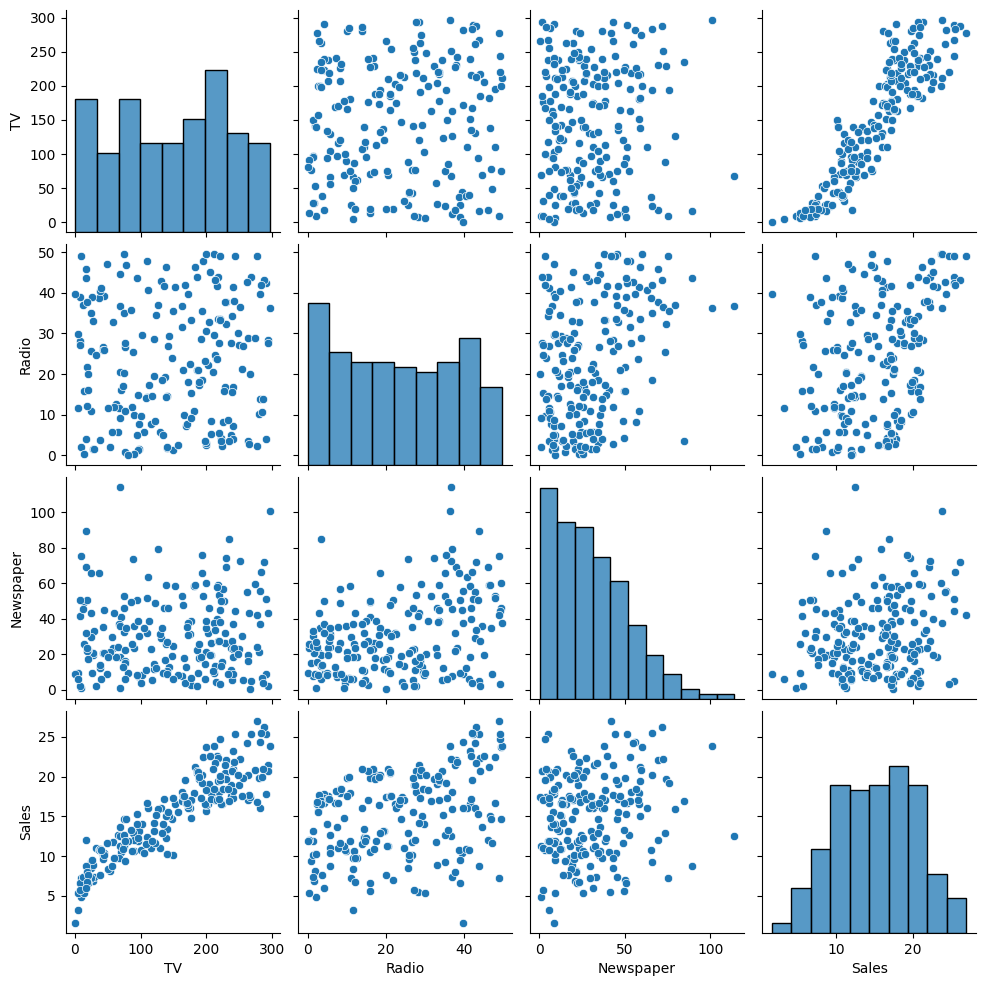

In [ ]:
sns.pairplot(df)

/tmp/ipykernel_33/1735462305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TV"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


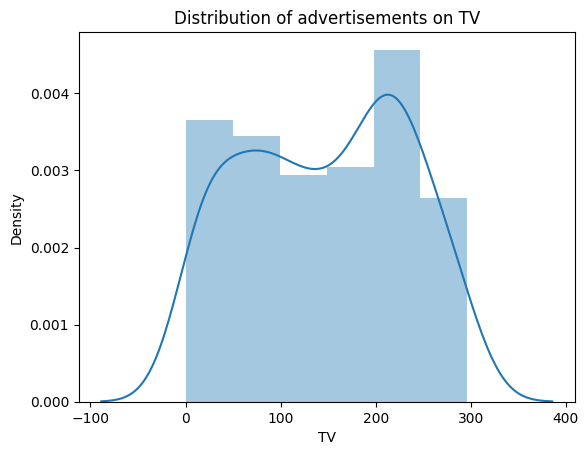

In [12]:
sns.distplot(df["TV"])
plt.title("Distribution of advertisements on TV")
plt.show()

/tmp/ipykernel_33/2918823349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Radio"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


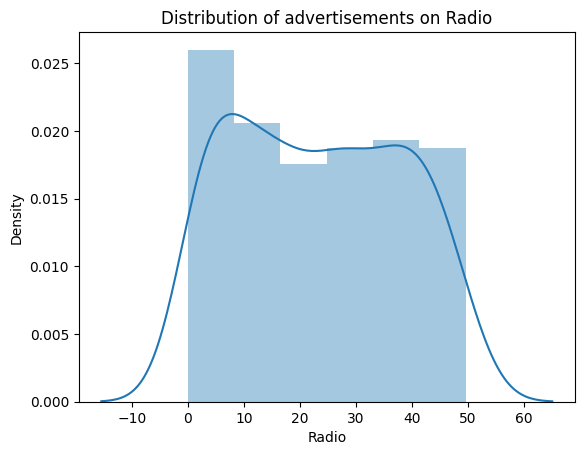

In [14]:
sns.distplot(df["Radio"])
plt.title("Distribution of advertisements on Radio")
plt.show()

/tmp/ipykernel_33/3730297134.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Newspaper"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


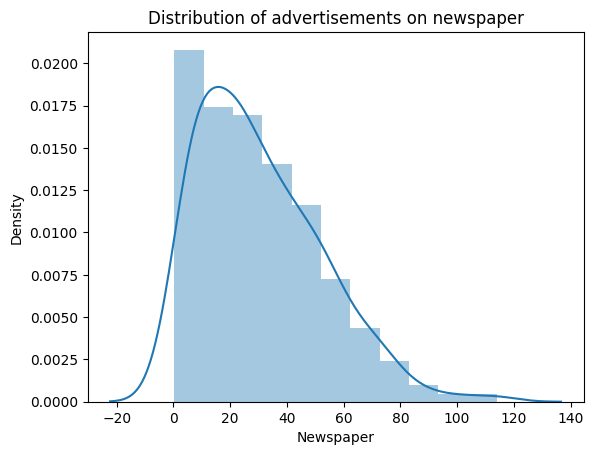

In [15]:
sns.distplot(df["Newspaper"])
plt.title("Distribution of advertisements on newspaper")
plt.show()

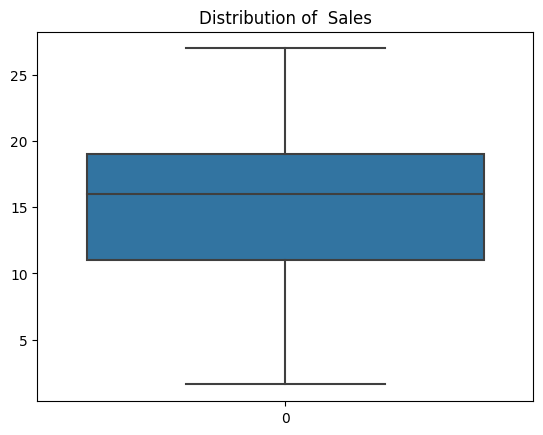

In [26]:
sns.boxplot(df["Sales"])
plt.title("Distribution of  Sales")
plt.show()

Text(0.5, 1.0, 'Advertisement on Radio vs Sales')

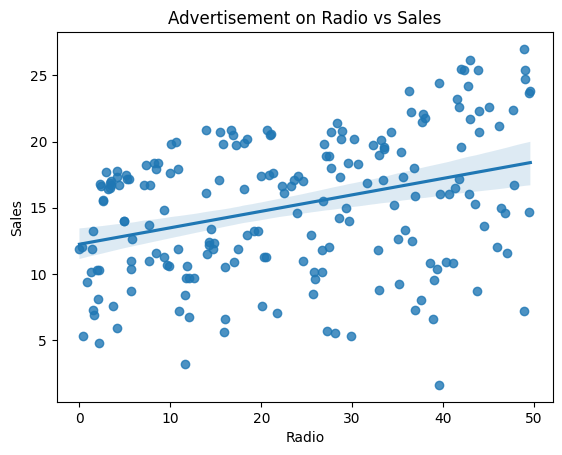

In [19]:
sns.regplot(x="Radio",y="Sales",data=df)
plt.title("Advertisement on Radio vs Sales")

Text(0.5, 1.0, 'Advertisement on TV vs Sales')

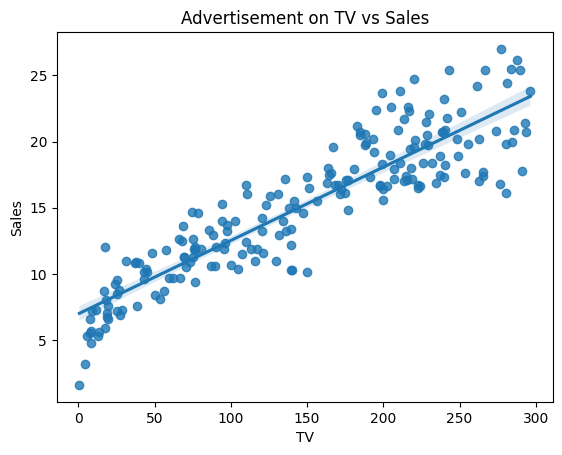

In [17]:
sns.regplot(x="TV",y="Sales",data=df)
plt.title("Advertisement on TV vs Sales")

Text(0.5, 1.0, 'Advertisement on Newspaper vs Sales')

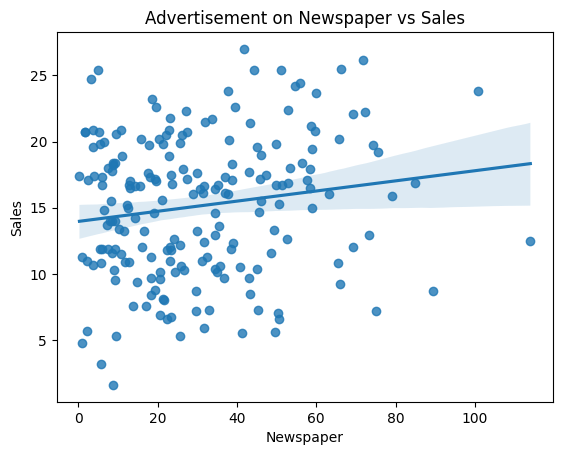

In [18]:
sns.regplot(x="Newspaper",y="Sales",data=df)
plt.title("Advertisement on Newspaper vs Sales")

<Axes: >

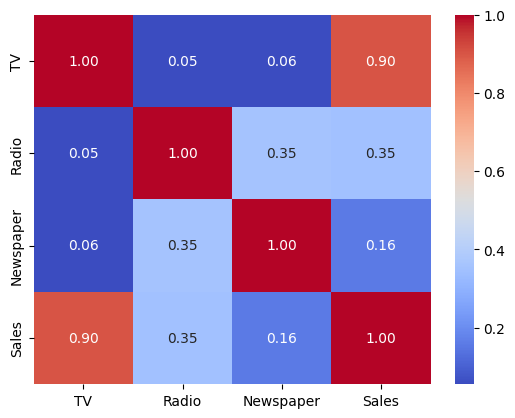

In [24]:
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap="coolwarm")

# preprocessing

In [40]:
x=df["TV"]
y=df["Sales"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [53]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)
print(" mean_squared_error for LinearRegression")
print(mse)
print(" r2_score for LinearRegression")
print(r2)

 mean_squared_error for LinearRegression
0.004984838740656986
 r2_score for LinearRegression
0.8763675761069125


Text(0.5, 1.0, 'plot for LinearRegressor')

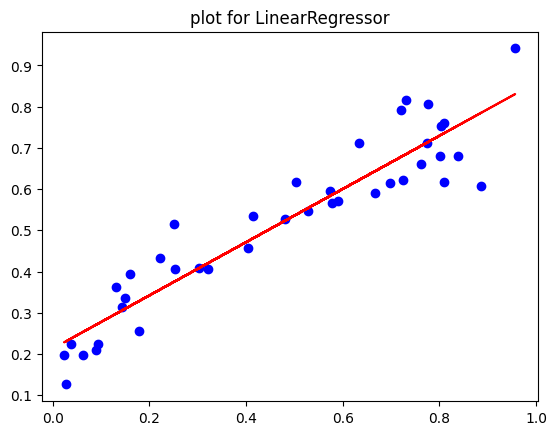

In [56]:
plt.scatter(x_test , y_test , color="b" ,  label='Actual Data' )
plt.plot(x_test , y_pred , label="Regresion Line " , color='r')
plt.title("plot for LinearRegressor")

In [57]:
from sklearn.linear_model import Lasso,Ridge

model=Lasso().fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(" mean_squared_error for LassoRegression")
print(mse)
print(" r2_score for LassoRegression")
print(r2)


 mean_squared_error for LassoRegression
0.040580388973277946
 r2_score for LassoRegression
-0.00646221719690776


Text(0.5, 1.0, 'plot for LassoRegressor')

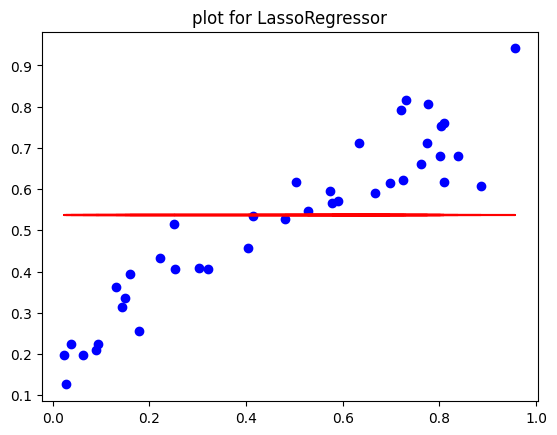

In [58]:
plt.scatter(x_test , y_test , color="b" ,  label='Actual Data' )
plt.plot(x_test , y_pred , label="Regresion Line " , color='r')
plt.title("plot for LassoRegressor")

In [59]:
model=Ridge().fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(" mean_squared_error for RidgeRegression")
print(mse)
print(" r2_score for RidgeRegression")
print(r2)


 mean_squared_error for RidgeRegression
0.005166737121583306
 r2_score for RidgeRegression
0.8718561888973866


Text(0.5, 1.0, 'plot for RidgeRegressor')

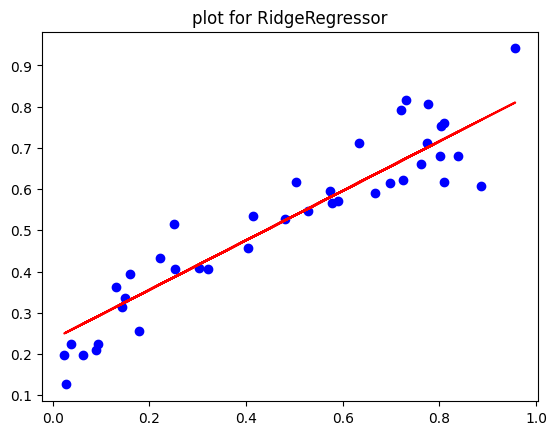

In [60]:
plt.scatter(x_test , y_test , color="b" ,  label='Actual Data' )
plt.plot(x_test , y_pred , label="Regresion Line " , color='r')
plt.title("plot for RidgeRegressor")